In [1]:
!wget -c "https://c1.staticflickr.com/7/6198/6065534468_4ab2820f68.jpg" -O 'locally adaptive histogram.jpg'

--2019-04-10 17:41:37--  https://c1.staticflickr.com/7/6198/6065534468_4ab2820f68.jpg
Resolving c1.staticflickr.com (c1.staticflickr.com)... 87.248.114.12, 87.248.114.11, 87.248.116.11, ...
Connecting to c1.staticflickr.com (c1.staticflickr.com)|87.248.114.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19798 (19K) [image/jpeg]
Saving to: 'locally adaptive histogram.jpg'

locally adaptive hi 100%[===================>]  19.33K  --.-KB/s    in 0.004s  

2019-04-10 17:41:37 (5.15 MB/s) - 'locally adaptive histogram.jpg' saved [19798/19798]



In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

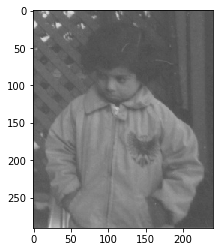

In [3]:
%matplotlib inline
img = cv2.imread('locally adaptive histogram.jpg')
plt.imshow(img)

In [4]:
def intensity(img):
    intensity_scale = np.zeros(256, np.int32)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            for z in range(img.shape[2]):
                intensity = img[i][j][z]
                intensity_scale[intensity] += 1
    return intensity_scale/(img.shape[0] * img.shape[1] * img.shape[2])

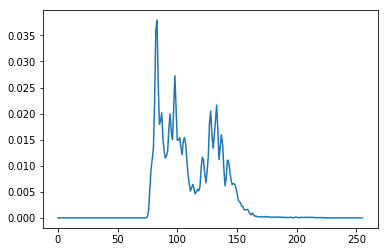

In [5]:
plt.plot(intensity(img))

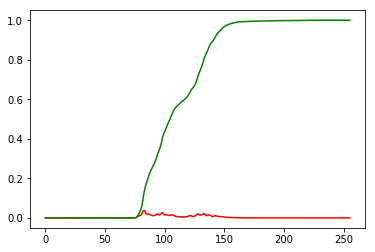

In [7]:
old_instensity = intensity(img)
new_intensity = np.cumsum(old_instensity)

%matplotlib inline
import matplotlib.pyplot as plt
intensity(img)
plt.plot(old_instensity, color="r")
plt.plot(new_intensity, color="g")

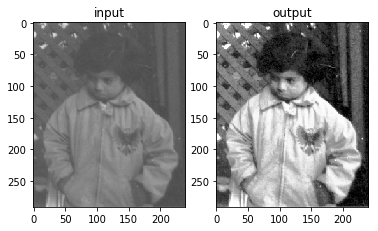

In [10]:
new_image = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
new_style = np.uint8(255 * new_intensity)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for z in range(img.shape[2]):
            new_image[i, j, z] = new_intensity[(img[i, j, z])]# // 3

figure, axes = plt.subplots(1,2)
axes[0].imshow(img)
axes[0].set_title("input")
axes[1].imshow(new_image)
axes[1].set_title("output")